In [56]:
# import dependencies
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [28]:
# importing the nltk and downloading the stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# printing the stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
# loading dataset
data = pd.read_csv('train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [31]:
# checking the number of rows and columns of the dataset
data.shape

(20800, 5)

In [32]:
data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [33]:
# checking the number of null data in the dataset
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [34]:
# checking if there are duplicated data
data.duplicated().sum()

np.int64(0)

### Data preprossessing

In [35]:
# adding NA to data not available
data = data.fillna('')

In [36]:
# checking if the Fill NA worked
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [37]:
# merging author and title columns
data['content'] = data['author'] + " " + data['title']

In [38]:
# checking the data after the merge
data['content'].head()

0    Darrell Lucus House Dem Aide: We Didn’t Even S...
1    Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2    Consortiumnews.com Why the Truth Might Get You...
3    Jessica Purkiss 15 Civilians Killed In Single ...
4    Howard Portnoy Iranian woman jailed for fictio...
Name: content, dtype: object

### Stemming - reduce the words to its root

In [39]:
port_stem = PorterStemmer()


In [40]:
# creating a stemming function
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content) # keep just letters
    stemmed_content = stemmed_content.lower() # tranform to lower case
    stemmed_content = stemmed_content.split() # split the content
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # stem the words
    stemmed_content = ' '.join(stemmed_content) 
    return stemmed_content

In [41]:
# applying the funcion to the dataset column 'content'
data['content'] = data['content'].apply(stemming)

In [42]:
# splitting the data in features and  in target
X = data['content'].values
y = data['label'].values

In [43]:
# printing feature array
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

## Converting text to numerical data

In [44]:
# vectorize, fit and transform the content
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)


In [45]:
# printing the vectorized content
print(X)

  (np.int32(0), np.int32(267))	0.2701012497770876
  (np.int32(0), np.int32(2483))	0.36765196867972083
  (np.int32(0), np.int32(2959))	0.24684501285337127
  (np.int32(0), np.int32(3600))	0.3598939188262558
  (np.int32(0), np.int32(3792))	0.27053324808454915
  (np.int32(0), np.int32(4973))	0.23331696690935097
  (np.int32(0), np.int32(7005))	0.2187416908935914
  (np.int32(0), np.int32(7692))	0.24785219520671598
  (np.int32(0), np.int32(8630))	0.2921251408704368
  (np.int32(0), np.int32(8909))	0.36359638063260746
  (np.int32(0), np.int32(13473))	0.2565896679337956
  (np.int32(0), np.int32(15686))	0.2848506356272864
  (np.int32(1), np.int32(1497))	0.2939891562094648
  (np.int32(1), np.int32(1894))	0.15521974226349364
  (np.int32(1), np.int32(2223))	0.3827320386859759
  (np.int32(1), np.int32(2813))	0.19094574062359204
  (np.int32(1), np.int32(3568))	0.26373768806048464
  (np.int32(1), np.int32(5503))	0.7143299355715573
  (np.int32(1), np.int32(6816))	0.1904660198296849
  (np.int32(1), np.in

In [46]:
# Splitting the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [47]:
# importing the model, fitting and predicting the train data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)

In [48]:
# accuracy score for train data
acc_train = accuracy_score(y_train, pred_train)
acc_train

0.9863581730769231

In [49]:
# predictoin the test data
pred_test = model.predict(X_test)

In [50]:
# accuracy score for test data
acc_test = accuracy_score(y_test, pred_test)
acc_test

0.9790865384615385

In [54]:
classification = classification_report(y_test, pred_test)
print(classification)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



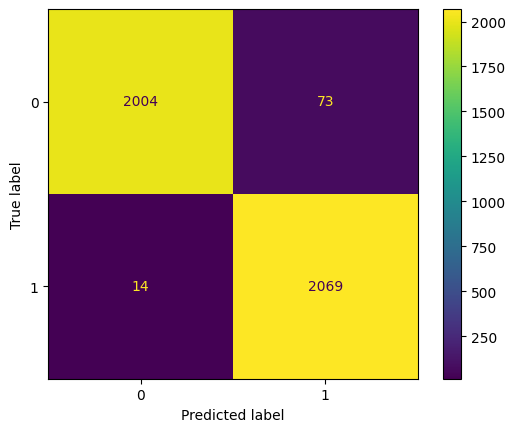

In [57]:
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Making a predictive system

In [51]:
X_new = X_test[18]
pred_new = model.predict(X_new)
print(pred_new)

if pred_new == 0:
    print('The news is REAL')
else:
    print('The news is FAKE')

[0]
The news is REAL
